In this notebook I accomplished several things. First I converted the StartDate column into datetime objects. Then I systematically created subsets for each nutrient separating our dataframce into samples taken before 2013 and samples taken during or after 2013. This separates the samples by the 2013 zoning ordinance that legalized Urban Farms in Boston. I did some visualizations. Box Plots comparing the two subsets for Phosphorus, Ammonia, and Nitrogen did not reveal any glaring difference in distributions. 

I then imported the Urban Farm location data that Gretchen and I compiled. From there I created a function that utilizes the Haversine formula to calculate the shortest distance in km from each sampling station to the nearest Urban Farm using the Latitude and Longitude columns in each dataframe. I then added a closest_farm_distance_km column that contains these distances for each sample to the water quality database. 

Next, I created scatterplots comparing each sample's nutrient levels against the new distance variable. These are saved in the Figures folder. There appears to be a very slight negative relationship but likely not anything statistically significant. 

I also ran OLS regressions of Nitrogen levels on distance variable for both the pre2013 and post2013 datasets. The pre2013 regression returned an R squared of .012 and an estimated coefficient of -0.0068 with a SE of .003. The post2013 regression returned an R squared of .065 and a coefficient of -.01 with a SE of .004.

Next steps are to the same regression on pre and post 2013 samples for other nutrients, do a multiple regresson of all samples for each nutrient on distance and a binary post 2013 variable. 

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_excel('/Users/liamzeeum/Github/group4-project/Cleaned_Data.xlsx')
df.head()

,Watershed,Latitude,Longitude,StartDate,StartTime,DWM_Name,DWM_Units,ResVal,nResult
0,South Coastal,42.160283,-70.788634,6/25/2019,1:10:00 PM,Ammonia-N,mg/L,<0.20,-0.200
1,South Coastal,42.160283,-70.788634,6/25/2019,1:10:00 PM,Nitrate/Nitrite-N,mg/L,<0.20,-0.200
2,South Coastal,42.160283,-70.788634,6/25/2019,1:10:00 PM,Total Nitrogen,mg/L,0.77,0.770
3,South Coastal,42.160283,-70.788634,6/25/2019,1:10:00 PM,Total Phosphorus,mg/L,0.056,0.056
4,South Coastal,42.187649,-70.768508,6/25/2019,1:50:00 PM,Ammonia-N,mg/L,<0.20,-0.200


,Watershed,Latitude,Longitude,StartDate,StartTime,DWM_Name,DWM_Units,ResVal,nResult,closest_farm_distance_km
381,South Coastal,41.848792,-70.549915,2011-09-14,1:20:00 PM,Total Nitrogen,mg/L,0.44,0.44,65.299666
384,South Coastal,41.986540,-70.698858,2011-06-28,2:20:00 PM,Total Nitrogen,mg/L,0.67,0.67,45.737541
386,South Coastal,41.987834,-70.707868,2011-06-28,2:46:00 PM,Total Nitrogen,mg/L,0.80,0.80,45.117642
388,South Coastal,42.003955,-70.722156,2011-06-28,3:27:00 PM,Total Nitrogen,mg/L,0.59,0.59,43.008705
390,South Coastal,41.997918,-70.722181,2011-06-28,4:08:00 PM,Total Nitrogen,mg/L,0.78,0.78,43.490781


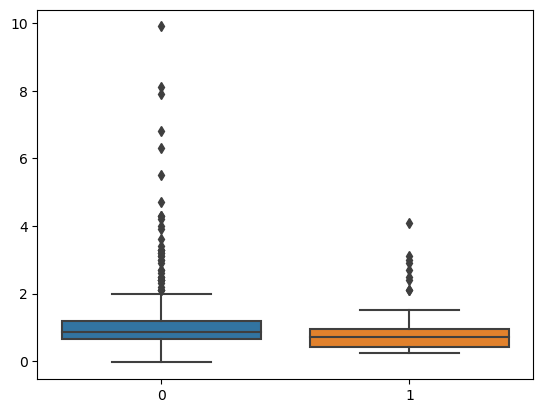

In [26]:
df_copy= df.copy

df_copy['StartDate'] = pd.to_datetime(df_copy['StartDate'], format='%m/%d/%Y')

nitrogen_pre2013_df = df_copy.loc[(df_copy['StartDate'].dt.year<2013) & (df_copy['DWM_Name'] == 'Total Nitrogen')]
nitrogen_post2013_df = df_copy.loc[(df_copy['StartDate'].dt.year>=2013) & (df_copy['DWM_Name'] == 'Total Nitrogen')]

import seaborn as sns

nitrogen_data = [nitrogen_pre2013_df['nResult'], nitrogen_post2013_df['nResult']]
sns.boxplot(data=nitrogen_data)
nitrogen_pre2013_df.head()







<AxesSubplot:>

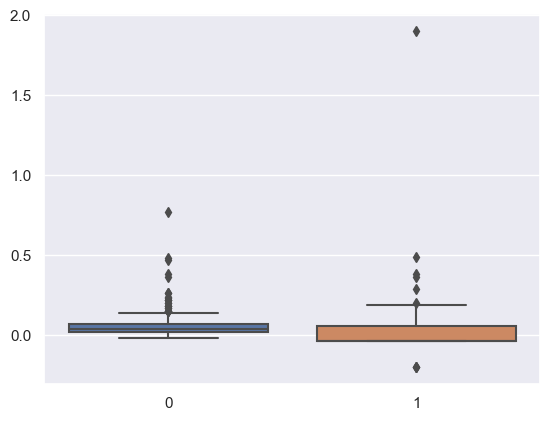

In [53]:
ammonia_pre2013_df = df_copy.loc[(df_copy['StartDate'].dt.year<2013) & (df_copy['DWM_Name'] == 'Ammonia-N')]
ammonia_post2013_df = df_copy.loc[(df_copy['StartDate'].dt.year>=2013) & (df_copy['DWM_Name'] == 'Ammonia-N')]

import seaborn as sns

ammonia_data = [ammonia_pre2013_df['nResult'], ammonia_post2013_df['nResult']]
sns.boxplot(data=ammonia_data)

<AxesSubplot:>

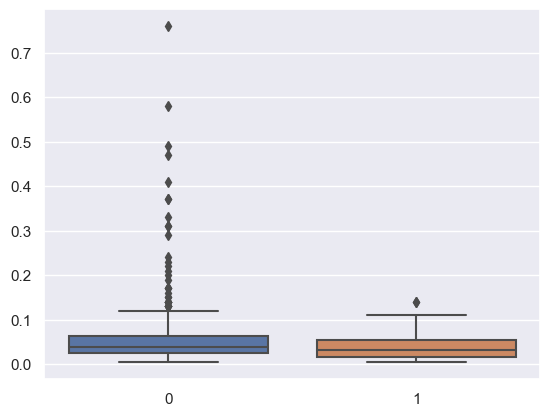

In [52]:
phosphorus_pre2013_df = df_copy.loc[(df_copy['StartDate'].dt.year<2013) & (df_copy['DWM_Name'] == 'Total Phosphorus')]
phosphorus_post2013_df = df_copy.loc[(df_copy['StartDate'].dt.year>=2013) & (df_copy['DWM_Name'] == 'Total Phosphorus')]

import seaborn as sns

phosphorus_data = [phosphorus_pre2013_df['nResult'], phosphorus_post2013_df['nResult']]
sns.boxplot(data=ammonia_data)

In [29]:
urbanfarm_df = pd.read_excel('/Users/liamzeeum/Github/group4-project/Urban Farm Location Data.xlsx')
urbanfarm_df.head()
urbanfarm_df

,Urban_Farm,Latitude,Longitude,Date_Started
0,"GLENWAY FARM, DORCHESTER",42.298743,-71.081662,2013
1,THE WEST COTTAGE FARM,42.320561,-71.074605,2013
2,87-89 CALLENDER STREET,42.288775,-71.082470,2016
3,SPORTSMEN'S TENNIS AND ENRICHMENT CENTER,42.292033,-71.088257,2013
4,CORNER STALK FARM,42.382788,-71.038268,2014
5,EASTIE FARM,42.368045,-71.036864,2015
6,FENWAY FARMS,42.346736,-71.097238,2015
7,WE GROW MICROGREENS,42.243007,-71.136730,2019
8,ALLANDALE FARMS,42.302382,-71.139116,1800
9,ASTORIA FARM,42.280889,-71.086793,2017


In [30]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    distance_lon = lon2-lon1
    distance_lat = lat2-lat1
    a = sin(distance_lat/2)**2 + cos(lat1) * cos(lat2) * sin(distance_lon/2)**2
    c = 2 * asin(sqrt(a))
    km = 6367 * c
    return km

distances = []
for i, sample in df_copy.iterrows():
    min_distance = np.inf
    for j, farm in urbanfarm_df.iterrows():
        distance = haversine(sample['Latitude'], sample['Longitude'], farm['Latitude'], farm['Longitude'])
        if distance < min_distance:
            min_distance=distance
    distances.append(min_distance)

df_copy['closest_farm_distance_km'] = distances

df_copy.head()





,Watershed,Latitude,Longitude,StartDate,StartTime,DWM_Name,DWM_Units,ResVal,nResult,closest_farm_distance_km
0,South Coastal,42.160283,-70.788634,2019-06-25,1:10:00 PM,Ammonia-N,mg/L,<0.20,-0.200,27.900587
1,South Coastal,42.160283,-70.788634,2019-06-25,1:10:00 PM,Nitrate/Nitrite-N,mg/L,<0.20,-0.200,27.900587
2,South Coastal,42.160283,-70.788634,2019-06-25,1:10:00 PM,Total Nitrogen,mg/L,0.77,0.770,27.900587
3,South Coastal,42.160283,-70.788634,2019-06-25,1:10:00 PM,Total Phosphorus,mg/L,0.056,0.056,27.900587
4,South Coastal,42.187649,-70.768508,2019-06-25,1:50:00 PM,Ammonia-N,mg/L,<0.20,-0.200,28.037568


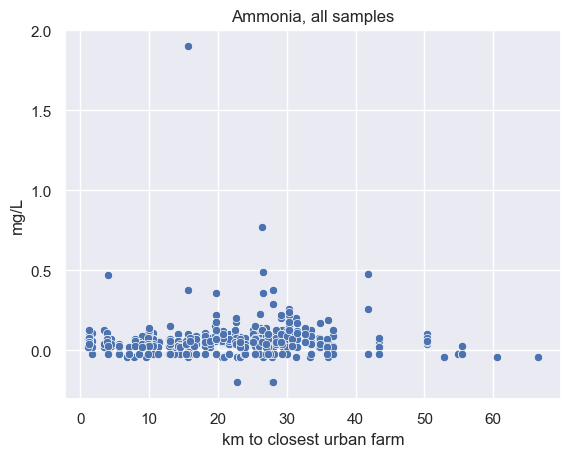

In [59]:
sns.set_theme()

ammonia_distance_df = df_copy.loc[(df_copy['DWM_Name'] == 'Ammonia-N')]
figure, ax = plt.subplots()
sns.scatterplot(data=ammonia_distance_df, x='closest_farm_distance_km', y='nResult')
ax.set_title('Ammonia, all samples')
ax.set_ylabel('mg/L')
ax.set_xlabel('km to closest urban farm')
plt.savefig('/Users/liamzeeum/Github/group4-project/Figures/Ammonia_all_samples')


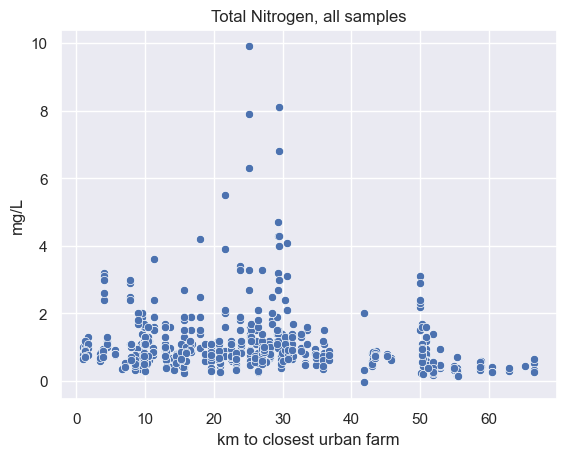

In [60]:
nitrogen_distance_df = df_copy.loc[(df_copy['DWM_Name'] == 'Total Nitrogen')]
figure, ax = plt.subplots()
sns.scatterplot(data=nitrogen_distance_df, x='closest_farm_distance_km', y='nResult')
ax.set_title('Total Nitrogen, all samples')
ax.set_ylabel('mg/L')
ax.set_xlabel('km to closest urban farm')
plt.savefig('/Users/liamzeeum/Github/group4-project/Figures/Nitrogen_all_samples')



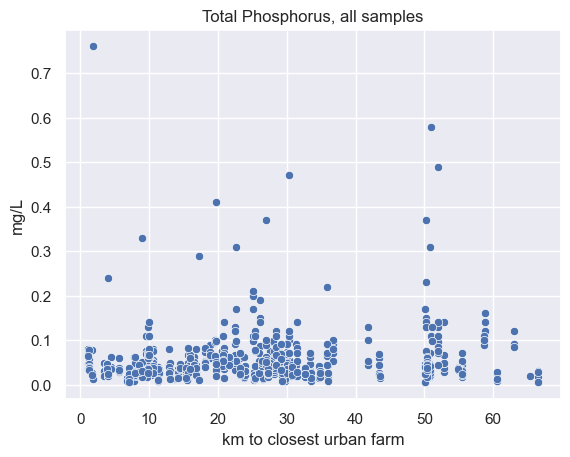

In [61]:
phosphorus_distance_df = df_copy.loc[(df_copy['DWM_Name'] == 'Total Phosphorus')]
figure, ax = plt.subplots()
sns.scatterplot(data=phosphorus_distance_df, x='closest_farm_distance_km', y='nResult')
ax.set_title('Total Phosphorus, all samples')
ax.set_ylabel('mg/L')
ax.set_xlabel('km to closest urban farm')
plt.savefig('/Users/liamzeeum/Github/group4-project/Figures/Phosphorus_all_samples')


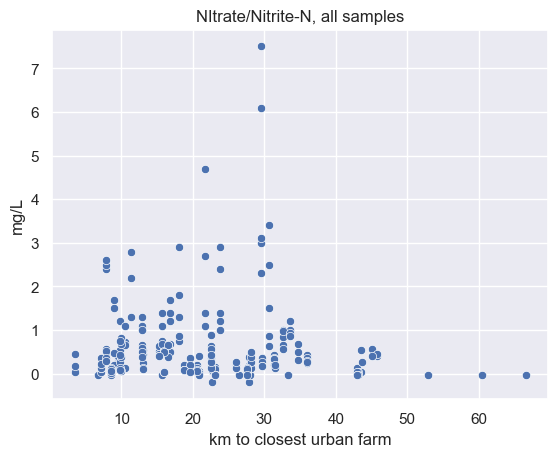

In [62]:
nitrate_distance_df = df_copy.loc[(df_copy['DWM_Name'] == 'Nitrate/Nitrite-N')]
figure, ax = plt.subplots()
sns.scatterplot(data=nitrate_distance_df, x='closest_farm_distance_km', y='nResult')
ax.set_title('NItrate/Nitrite-N, all samples')
ax.set_ylabel('mg/L')
ax.set_xlabel('km to closest urban farm')
plt.savefig('/Users/liamzeeum/Github/group4-project/Figures/Nitrate_all_samples')


In [55]:
import statsmodels.formula.api as smf
ols_nitrogen_pre_2013 = smf.ols(formula='nResult ~ closest_farm_distance_km', data= nitrogen_pre2013_df).fit()
ols_nitrogen_post_2013 = smf.ols(formula='nResult ~ closest_farm_distance_km', data= nitrogen_post2013_df).fit()
ols_nitrogen_post_2013.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                nResult   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     7.320
Date:                Sun, 23 Apr 2023   Prob (F-statistic):            0.00796
Time:                        13:10:55   Log-Likelihood:                -104.65
No. Observations:                 107   AIC:                             213.3
Df Residuals:                     105   BIC:                             218.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.1361      0.123      9.202      0.000       0.891       1.381
closest_farm_distance_km    -0.0101      0.004     -2.706      0.008      -0.017      -0.003
==============================================================================
Omnibus:                       75.042   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              357.989
Skew:                           2.471   Prob(JB):                     1.83e-78
Kurtosis:                      10.474   Cond. No.                         65.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

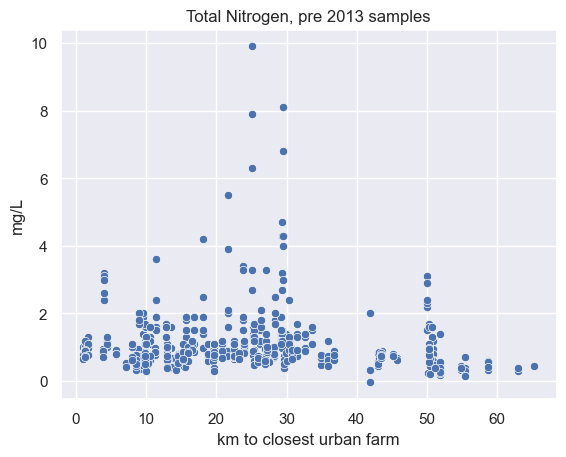

In [64]:
figure, ax = plt.subplots()
sns.scatterplot(data=nitrogen_pre2013_df, x='closest_farm_distance_km', y= 'nResult')
ax.set_title('Total Nitrogen, pre 2013 samples')
ax.set_ylabel('mg/L')
ax.set_xlabel('km to closest urban farm')
plt.savefig('/Users/liamzeeum/Github/group4-project/Figures/Nitrogen_pre2013_samples')

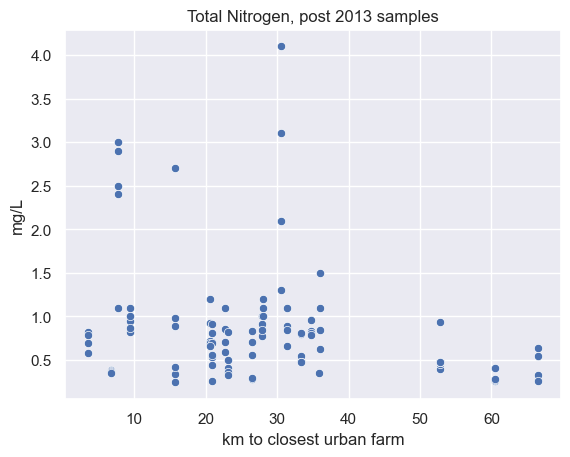

In [63]:
figure, ax = plt.subplots()
sns.scatterplot(data=nitrogen_post2013_df, x='closest_farm_distance_km', y= 'nResult')
ax.set_title('Total Nitrogen, post 2013 samples')
ax.set_ylabel('mg/L')
ax.set_xlabel('km to closest urban farm')
plt.savefig('/Users/liamzeeum/Github/group4-project/Figures/Nitrogen_post2013_samples')
